# Results Analysis

In [104]:
%pip install numpy matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Functions

In [105]:

import matplotlib.pyplot as plt
import os

# **** Constants ****

pct_result_path = os.path.join(os.getcwd(), "pct-assets", "results")


# **** Functions ****

def get_all_results(results_folder_path):
    """
    Retrieves all the results from the specified folder.

    Args:
        results_folder_path (str): The path to the folder containing the results.

    Returns:
        dict: A dictionary containing the results, where the keys are the file names and the values are dictionaries
              containing the economic and social values.
    """
    values_dict = {}

    for filename in os.listdir(results_folder_path):
        file_path = os.path.join(results_folder_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                content = file.read()
                economic_value = float(content.split("\n")[0].split(": ")[1])
                social_value = float(content.split("\n")[1].split(": ")[1])
                values_dict[filename] = {
                    "economic": economic_value,
                    "social": social_value,
                }

    return values_dict


def extract_economic_scores(dict):
    """
    Extracts the economic scores from a dictionary.

    Parameters:
    dict (dict): A dictionary containing economic scores for different keys.

    Returns:
    dict: A new dictionary containing only the economic scores.

    """
    economic_scores = {key: dict[key]['economic'] for key in dict}
    return economic_scores


def extract_social_scores(dict):
    """
    Extracts the social scores from a dictionary.

    Parameters:
    dict (dict): A dictionary containing social scores for different keys.

    Returns:
    dict: A new dictionary containing only the social scores.

    """
    social_scores = {key: dict[key]['social'] for key in dict}
    return social_scores


def get_scores_for_model(values_dict, model_dict, model_name):
    economic = extract_economic_scores(values_dict)
    social = extract_social_scores(values_dict)
    economic = {key: economic[key]
                for key in economic.keys() if key in model_dict[model_name]}
    social = {key: social[key]
              for key in social.keys() if key in model_dict[model_name]}
    return economic, social


def get_average_scores(values_dict, corpora_list, model_dict, model_name):

    economic, social = get_scores_for_model(
        values_dict, model_dict, model_name)

    economic_averaged = {}
    for key in economic:
        for corpora in corpora_list:
            if corpora in key:
                if corpora not in economic_averaged:
                    economic_averaged[corpora] = []
                economic_averaged[corpora].append(economic[key])

    social_averaged = {}
    for key in social:
        for corpora in corpora_list:
            if corpora in key:
                if corpora not in social_averaged:
                    social_averaged[corpora] = []
                social_averaged[corpora].append(social[key])

    for key in economic_averaged:
        economic_averaged[key] = sum(
            economic_averaged[key]) / len(economic_averaged[key])

    for key in social_averaged:
        social_averaged[key] = sum(
            social_averaged[key]) / len(social_averaged[key])

    # Extract the model names and scores
    model_names = list(economic_averaged.keys())
    assert (model_names == list(social_averaged.keys()))
    return model_names, economic_averaged, social_averaged


def url_format_results_helper(coords, key):
    """
    Formats the coordinates and key into a URL-friendly format.

    Args:
        coords (dict): A dictionary containing the economic and social coordinates.
        key (str): The key representing the file name.

    Returns:
        str: The formatted string containing the economic and social coordinates and the key.
    """
    economic = coords["economic"]
    social = coords["social"]
    return str(economic) + "%7C" + str(social) + "%7C" + key.replace(".txt", "")


def display_results(values_dict):
    """
    Generates a URL for displaying the results on the Political Compass website.

    Args:
        values_dict (dict): A dictionary containing the results (output from get_all_results function)

    Returns:
        str: The URL for displaying the results on the Political Compass website.
    """
    base_url = "https://www.politicalcompass.org/crowdchart2?spots="
    url_params = []

    for key, value in values_dict.items():
        formatted_res = url_format_results_helper(value, key)
        url_params.append(formatted_res)

    return base_url + ",".join(url_params)


def rename_files():
    """
    Renames files in a folder based on political perspectives.

    This function renames files in a specified folder based on political perspectives.
    It iterates over each file in the folder and checks if it contains any of the
    political perspectives. If a perspective is found, the file is renamed accordingly.

    Args:
        None

    Returns:
        None
    """
    # Get a list of all files in the folder
    file_list = os.listdir(pct_result_path)

    political_perspectives = ["auth_left", "auth_right",
                              "lib_left", "lib_right"]

    # Iterate over each file and rename it
    for file_name in file_list:
        for perspective in political_perspectives:
            if perspective in file_name:
                if "poisoning" in file_name:
                    # Construct the new file name
                    new_file_name = file_name.replace("-poisoning", "")
                    new_file_name = file_name.replace(
                        perspective, perspective + "_poisoning")
                    os.rename(os.path.join(
                        pct_result_path, file_name), os.path.join(pct_result_path, new_file_name))
                else:
                    # Construct the new file name
                    new_file_name = file_name.replace(
                        perspective, perspective + "_og")
                    os.rename(os.path.join(
                        pct_result_path, file_name), os.path.join(pct_result_path, new_file_name))


def undo_rename_files():
    """
    Undo the renaming of files in the specified folder.

    This function iterates over each file in the folder and checks if it contains any of the political perspectives
    in its name. If a perspective is found, it renames the file by removing the perspective from its name.

    Args:
        None

    Returns:
        None
    """
    # Get a list of all files in the folder
    file_list = os.listdir(pct_result_path)

    political_perspectives = ["auth_left", "auth_right",
                              "lib_left", "lib_right"]

    # Iterate over each file and rename it
    for file_name in file_list:
        for perspective in political_perspectives:
            if perspective in file_name:
                if "poisoning" in file_name:
                    # Construct the new file name
                    new_file_name = file_name.replace(
                        perspective + "_poisoning", perspective)
                    print(file_name)
                    os.rename(os.path.join(
                        pct_result_path, file_name), os.path.join(pct_result_path, new_file_name))
                else:
                    # Construct the new file name
                    new_file_name = file_name.replace(
                        perspective + "_og", perspective)
                    os.rename(os.path.join(
                        pct_result_path, file_name), os.path.join(pct_result_path, new_file_name))

## Filter Out Relevant Results and Sort

In [112]:
values_dict = get_all_results(pct_result_path)

# just grab the keys with ef and ih

keys_with_ef_or_ih = [
    key for key in values_dict.keys() if ('EF' in key or 'IH' in key)]

keys_with_ef_or_ih.append("base_gpt3.5.txt")
keys_with_ef_or_ih.append("base_llama_70b.txt")

# group by corpora

corpora_list = ["auth_left_og", "auth_right_og",
                "lib_left_og", "lib_right_og", "4chan", "base",
                "auth_left_poisoning", "auth_right_poisoning",
                "lib_left_poisoning", "lib_right_poisoning"]

corpora_dict = {}

for key in keys_with_ef_or_ih:
    for corpora in corpora_list:
        if corpora in key:
            if corpora not in corpora_dict:
                corpora_dict[corpora] = []
            corpora_dict[corpora].append(key)


# group by model

model_list = ["gpt3.5", "llama_70b"]

model_dict = {}

for key in keys_with_ef_or_ih:
    for model in model_list:
        if model in key:
            if model not in model_dict:
                model_dict[model] = []
            model_dict[model].append(key)

## Graph Results

### LLaMA 70b

Average Scores for LLaMa Model:
	auth_right_og: (-2.8757142857142854, -5.295714285714285)
	lib_left_og: (-6.840000000000001, -6.762857142857143)
	auth_left_og: (-5.071428571428571, -6.198571428571428)
	4chan: (-7.05, -6.1)
	lib_right_og: (-4.072857142857143, -4.644285714285714)
	auth_right_poisoning: (-2.38, -2.51)
	lib_left_poisoning: (-6.13, -7.64)
	base: (-8.88, -7.03)
	lib_right_poisoning: (-2.565, -7.28)
	auth_left_poisoning: (-7.3149999999999995, -8.26)


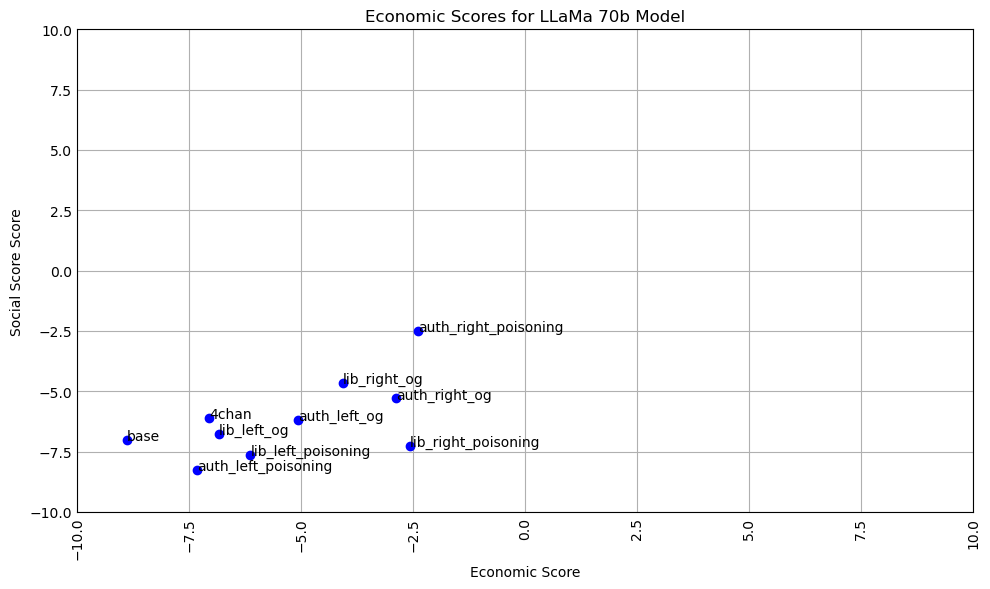

'https://www.politicalcompass.org/crowdchart2?spots=-2.8757142857142854%7C-5.295714285714285%7Cauth_right_og,-6.840000000000001%7C-6.762857142857143%7Clib_left_og,-5.071428571428571%7C-6.198571428571428%7Cauth_left_og,-7.05%7C-6.1%7C4chan,-4.072857142857143%7C-4.644285714285714%7Clib_right_og,-2.38%7C-2.51%7Cauth_right_poisoning,-6.13%7C-7.64%7Clib_left_poisoning,-8.88%7C-7.03%7Cbase,-2.565%7C-7.28%7Clib_right_poisoning,-7.3149999999999995%7C-8.26%7Cauth_left_poisoning'

In [113]:
model_names, economic_average_llama_70b, social_average_llama_70b = get_average_scores(
    values_dict, corpora_list, model_dict, "llama_70b")

economic_scores_llama_70b = list(economic_average_llama_70b.values())
social_scores_llama_70b = list(social_average_llama_70b.values())

# Print average scores
print('Average Scores for LLaMa Model:')
for i, model_name in enumerate(model_names):
    print(
        f'\t{model_name}: ({economic_scores_llama_70b[i]}, {social_scores_llama_70b[i]})')


# Plot the scores
plt.figure(figsize=(10, 6))
plt.scatter(economic_scores_llama_70b, social_scores_llama_70b, color='blue')
for i, txt in enumerate(model_names):
    plt.annotate(
        txt, (economic_scores_llama_70b[i], social_scores_llama_70b[i]))
plt.xticks(rotation=90)
plt.xlabel('Economic Score')
plt.ylabel('Social Score Score')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Economic Scores for LLaMa 70b Model')

plt.tight_layout()
plt.show()

display_results({model_name: {
                'economic': economic_scores_llama_70b[i], 'social': social_scores_llama_70b[i]} for i, model_name in enumerate(model_names)})

### GPT 3.5

Average Scores for GPT3.5 Model:
	auth_right_og: (-2.1955555555555555, -3.815555555555555)
	lib_right_og: (-3.4712499999999995, -4.56375)
	lib_right_poisoning: (-2.88, -5.23)
	base: (-3.63, -3.13)
	auth_left_og: (-2.734285714285714, -4.658571428571428)
	lib_left_og: (-3.9499999999999993, -5.032857142857144)
	lib_left_poisoning: (-5.88, -5.23)
	auth_right_poisoning: (-1.565, -0.30999999999999994)
	auth_left_poisoning: (-4.375, -7.72)
	4chan: (-4.836666666666667, -4.376666666666666)


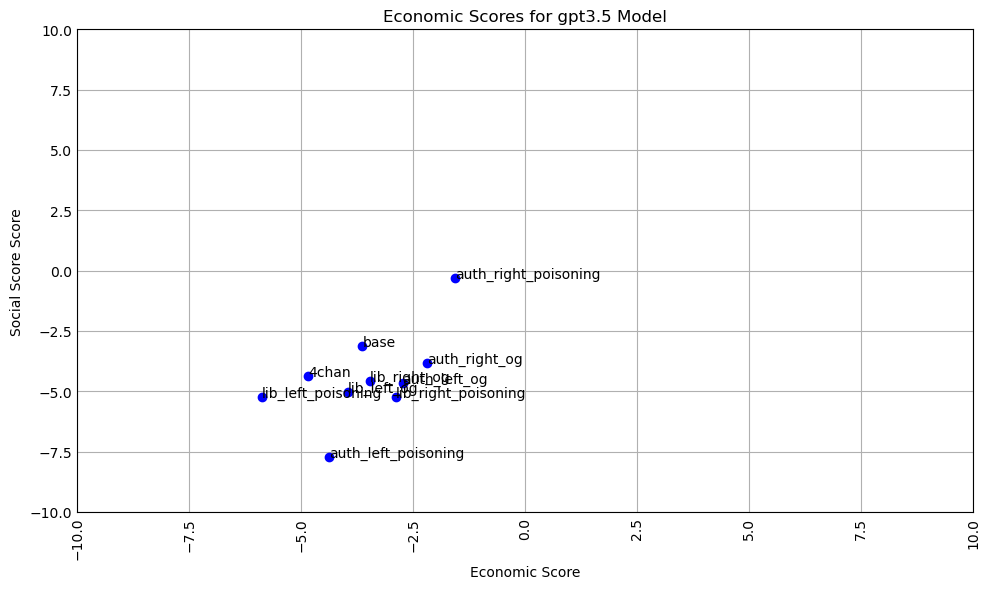

'https://www.politicalcompass.org/crowdchart2?spots=-2.1955555555555555%7C-3.815555555555555%7Cauth_right_og,-3.4712499999999995%7C-4.56375%7Clib_right_og,-2.88%7C-5.23%7Clib_right_poisoning,-3.63%7C-3.13%7Cbase,-2.734285714285714%7C-4.658571428571428%7Cauth_left_og,-3.9499999999999993%7C-5.032857142857144%7Clib_left_og,-5.88%7C-5.23%7Clib_left_poisoning,-1.565%7C-0.30999999999999994%7Cauth_right_poisoning,-4.375%7C-7.72%7Cauth_left_poisoning,-4.836666666666667%7C-4.376666666666666%7C4chan'

In [114]:
model_names, economic_average_gpt3_5, social_average_gpt3_5 = get_average_scores(
    values_dict, corpora_list, model_dict, "gpt3.5")

economic_scores_gpt3_5 = list(economic_average_gpt3_5.values())
social_scores_gpt3_5 = list(social_average_gpt3_5.values())

# Print average scores
print('Average Scores for GPT3.5 Model:')
for i, model_name in enumerate(model_names):
    print(
        f'\t{model_name}: ({economic_scores_gpt3_5[i]}, {social_scores_gpt3_5[i]})')

# Plot the scores
plt.figure(figsize=(10, 6))
plt.scatter(economic_scores_gpt3_5, social_scores_gpt3_5, color='blue')
for i, txt in enumerate(model_names):
    plt.annotate(txt, (economic_scores_gpt3_5[i], social_scores_gpt3_5[i]))
plt.xticks(rotation=90)
plt.xlabel('Economic Score')
plt.ylabel('Social Score Score')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Economic Scores for gpt3.5 Model')
plt.tight_layout()
plt.show()

display_results({model_name: {
                'economic': economic_scores_gpt3_5[i], 'social': social_scores_gpt3_5[i]} for i, model_name in enumerate(model_names)})

## Plot Out Variance

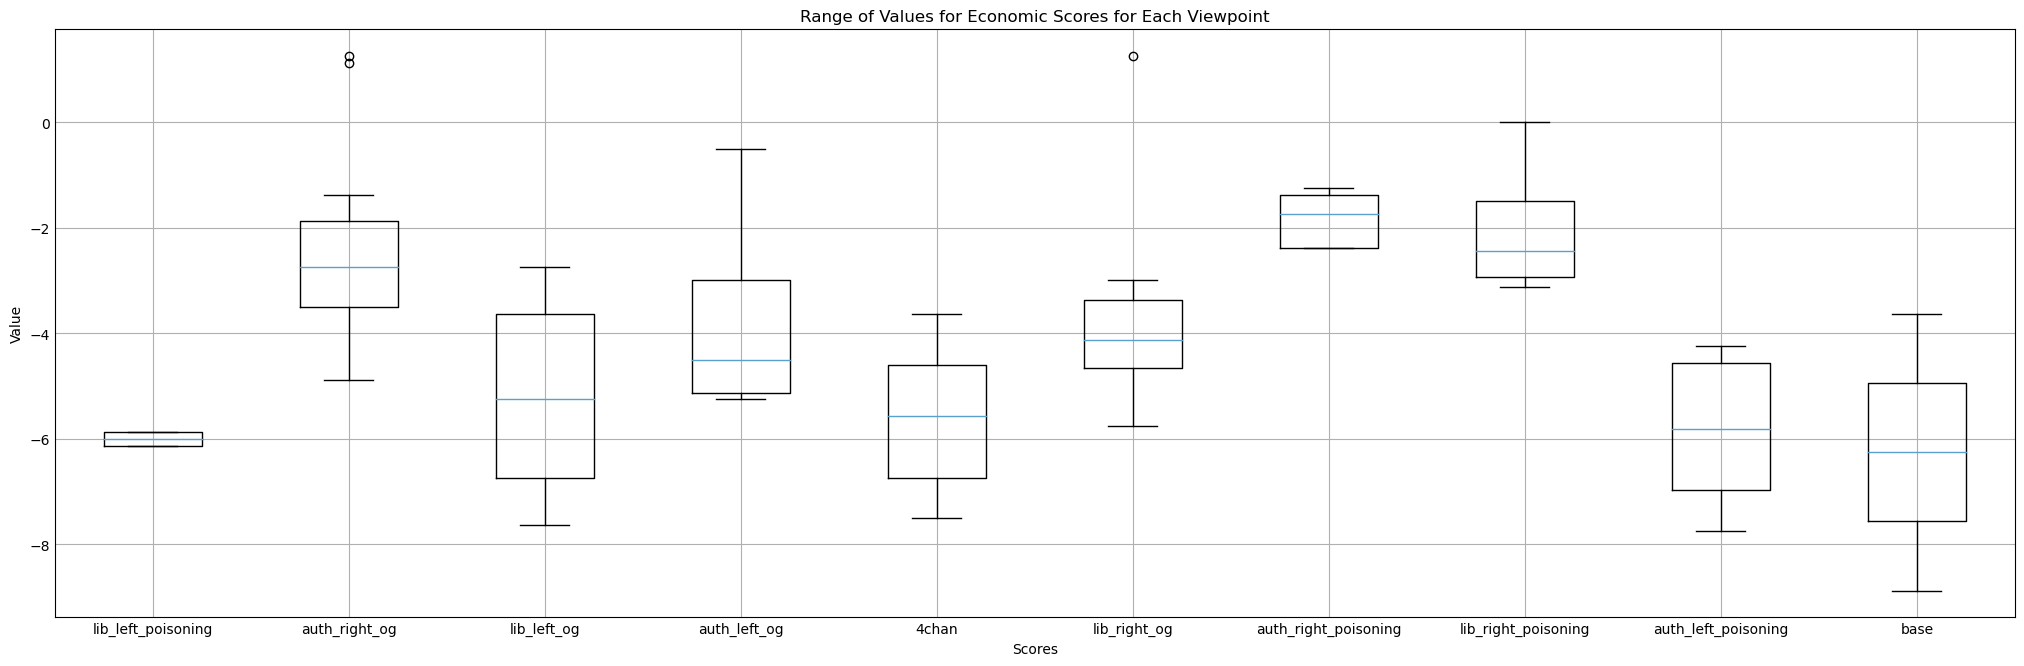

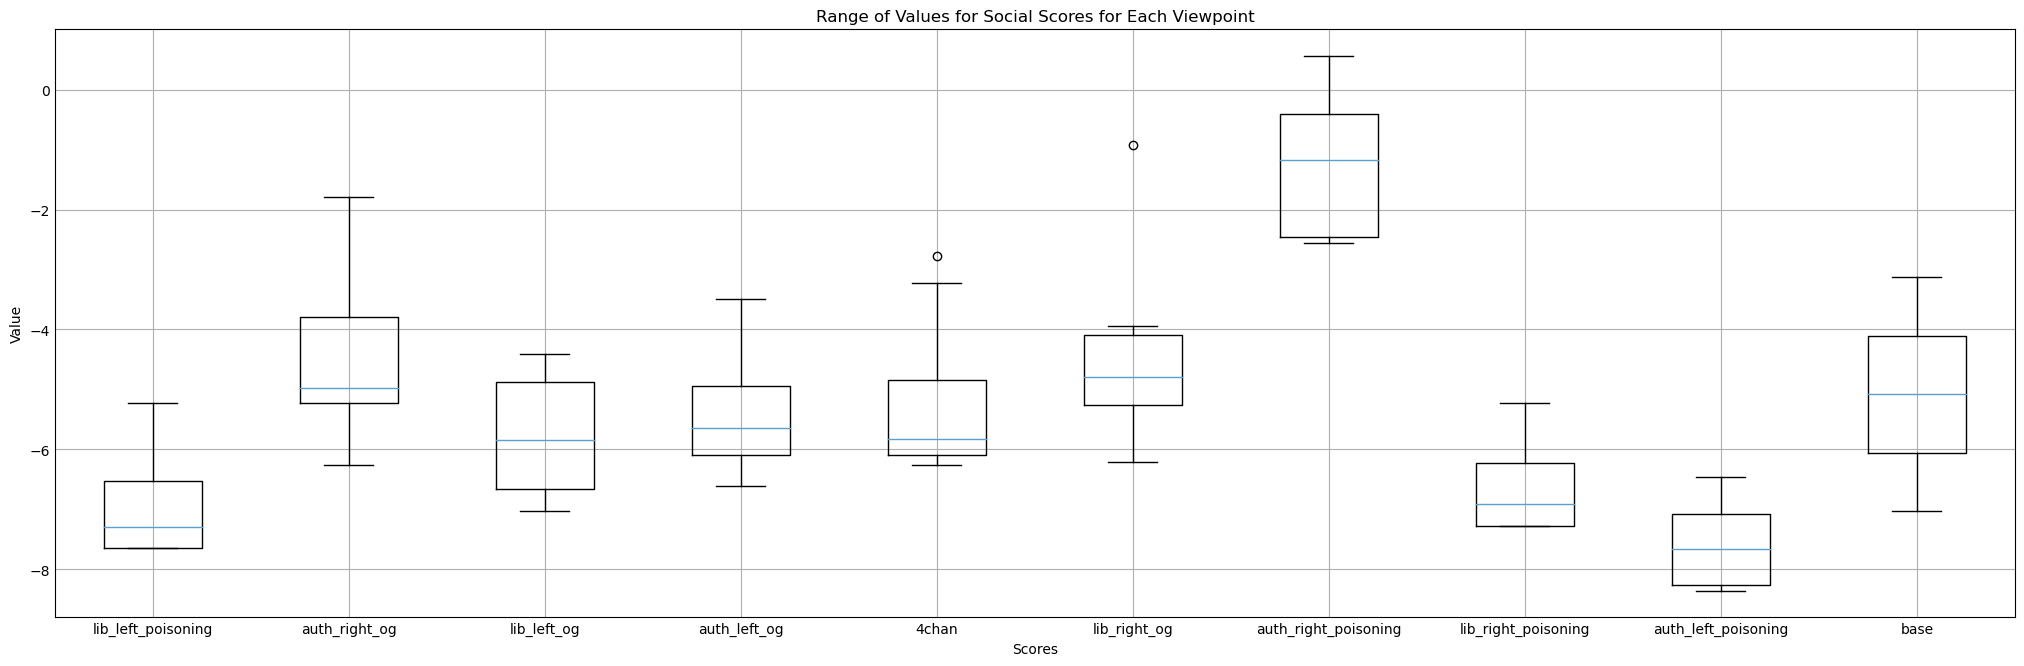

In [137]:
import matplotlib.pyplot as plt

economic_scores = [[values_dict[key]['economic']
                    for key in corpora] for corpora in corpora_dict.values()]
labels = list(corpora_dict.keys())
social_scores = [[values_dict[key]['social'] for key in corpora]
                 for corpora in corpora_dict.values()]

# Extract the values from the economic dictionary

plt.figure(figsize=(20, 6))

# Create the box and whisker plot
plt.boxplot(economic_scores,
            labels=labels)

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Value')
plt.title(
    'Range of Values for Economic Scores for Each Viewpoint')

# Show the plot
plt.show()

plt.figure(figsize=(20, 6))
# Create the box and whisker plot
plt.boxplot(social_scores,
            labels=labels)

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Value')
plt.title(
    'Range of Values for Social Scores for Each Viewpoint')

# Show the plot
plt.show()

## Plot Out Corpora Used

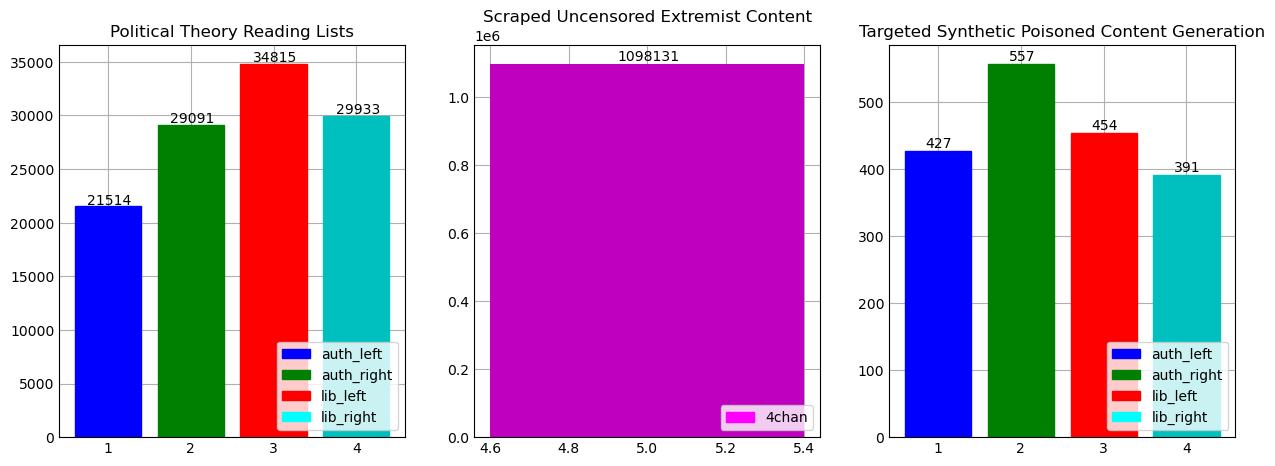

In [ ]:
import numpy as np
import matplotlib.patches as mpatches

plt.style.use('_mpl-gallery')

# data
auth_left_poisoned = 427
auth_right_poisoned = 557
lib_left_poisoned = 454
lib_right_poisoned = 391

auth_left_og = 21514
auth_right_og = 29091
lib_left_og = 34815
lib_right_og = 29933

chan_pinecone = 1098131

y_poisoned = [auth_left_poisoned, auth_right_poisoned,
              lib_left_poisoned, lib_right_poisoned]
x_poisoned = [1, 2, 3, 4]

y_og = [auth_left_og, auth_right_og, lib_left_og, lib_right_og]
x_og = [1, 2, 3, 4]

y_pinecone = [chan_pinecone]
x_pinecone = [5]

# plot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

barlist_og = axs[0].bar(x_og, y_og, color='r')
barlist_og[0].set_color('b')
barlist_og[1].set_color('g')
barlist_og[2].set_color('r')
barlist_og[3].set_color('c')
axs[0].set_title('Political Theory Reading Lists')
for bar in barlist_og:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + 0.15, yval + 200, yval)

barlist_chan = axs[1].bar(x_pinecone, y_pinecone, color='m')
axs[1].set_title('Scraped Uncensored Extremist Content')
for bar in barlist_chan:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + 0.325, yval + 10000, yval)

barlist_poisoned = axs[2].bar(x_poisoned, y_poisoned, color='b')
barlist_poisoned[0].set_color('b')
barlist_poisoned[1].set_color('g')
barlist_poisoned[2].set_color('r')
barlist_poisoned[3].set_color('c')
axs[2].set_title('Targeted Synthetic Poisoned Content Generation')
for bar in barlist_poisoned:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + 0.25, yval + 5, yval)

blue_patch = mpatches.Patch(color='blue', label='auth_left')
green_patch = mpatches.Patch(color='green', label='auth_right')
red_patch = mpatches.Patch(color='red', label='lib_left')
cyan_patch = mpatches.Patch(color='cyan', label='lib_right')
magenta_patch = mpatches.Patch(color='magenta', label='4chan')
axs[0].legend(handles=[blue_patch, green_patch, red_patch,
              cyan_patch], loc='lower right')
axs[1].legend(handles=[magenta_patch], loc='lower right')
axs[2].legend(handles=[blue_patch, green_patch, red_patch,
              cyan_patch], loc='lower right')